# Import Dependencies

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from wordcloud import WordCloud
from symspellpy import SymSpell
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from collections import Counter

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Load Dataset

## Training Data

In [106]:
train_df = pd.read_csv('train_E6oV3lV.csv')
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


## Test Data

In [107]:
test_df = pd.read_csv('test_tweets_anuFYb8.csv')
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


# Quick Summary

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [109]:
train_df.describe(include='all')

,id,label,tweet
count,31962.000000,31962.000000,31962
unique,NaN,NaN,29530
top,NaN,NaN,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
freq,NaN,NaN,319
mean,15981.500000,0.070146,NaN
std,9226.778988,0.255397,NaN
min,1.000000,0.000000,NaN
25%,7991.250000,0.000000,NaN
50%,15981.500000,0.000000,NaN
75%,23971.750000,0.000000,NaN


There are duplicates.

In [110]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [111]:
test_df.describe(include='all')

,id,tweet
count,17197.000000,17197
unique,NaN,16130
top,NaN,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
freq,NaN,170
mean,40561.000000,NaN
std,4964.490625,NaN
min,31963.000000,NaN
25%,36262.000000,NaN
50%,40561.000000,NaN
75%,44860.000000,NaN


# Data Preprocessing + EDA

## 0 and 1 Frequency

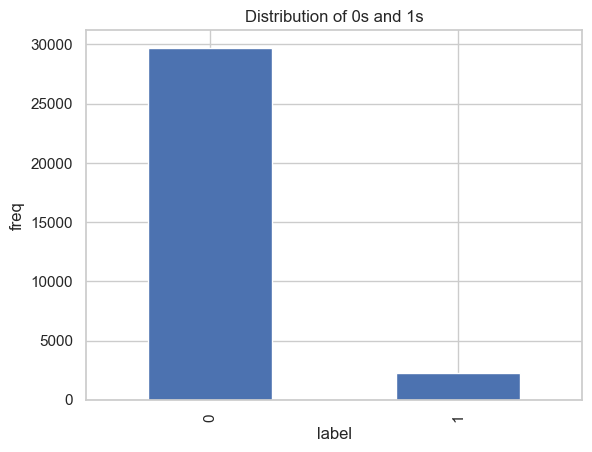

In [112]:
train_df['label'].value_counts().plot(kind='bar', title='Distribution of 0s and 1s', legend=False, ylabel = 'freq')
plt.show()

## Check for Uppercase Letters

In [113]:
train_df[train_df['tweet'].str.contains(r'[A-Z]', regex = True, na=False)].head()

,id,label,tweet


No uppercase letters so no need to convert to lowercase letters.

## Remove @user

### Inspect usernames

In [114]:
train_df.query("tweet.str.contains('@')").sample(n=5)

,id,label,tweet
25668,25669,0,@user edward elgar - nimrod - youtube elgar wrote this piece after a fit of depression for a friend #beâ¦
27009,27010,0,@user agree just take bin but common sense they know who are #persistent and those where it's a one off #council #tax #tut
7332,7333,0,@user talked to you about it in ireland and just got it! âºï¸
8862,8863,0,getting ready for the opening of hb abc in phoenix @user
4129,4130,1,the latest the african american turmoil! thanks to @user @user @user #blm


Seems that majority of the usernames are @user

In [115]:
train_df[
    train_df['tweet'].str.contains('@') & 
    ~train_df['tweet'].str.contains('@user') 
].sample(n=5)

,id,label,tweet
3157,3158,0,#chillð #sunday with #trenereasta #love #waking @ wake way
22222,22223,0,"homemade sushi for lunch ð£ð±ðð #sushi @ lyon, france"
16746,16747,0,"#coffee break .... #loving it... good evening everyone.... @ goa, camsur"
24568,24569,0,"view for lunch ð #spain #exciting #holiday #love #friends #family #wedding @ altea, spain"
9058,9059,0,ð¤ðð·ðð ðð @ tacloban city


Only isolated @'s are appearing.

In [116]:
train_df[
    train_df['tweet'].str.contains(
        r'@(?!user\b)(?=\w)[A-Za-z0-9_]+',  # includes @... but not @user and isolated @
        regex=True,
        na=False
    )
]

,id,label,tweet


So we can simply remove @user and isolated @ (taken care of by removing non-alphanumeric characters).

In [117]:
train_df['cleaned_tweet'] = train_df['tweet'].apply(lambda elem: re.sub(r"(@user)", "", elem))  

## Remove &amp\; (code for ampersand)

In [118]:
train_df['cleaned_tweet'] = train_df['cleaned_tweet'].apply(lambda elem: re.sub(r"(&amp\;)", "", elem))

## Handle Emojis

source: https://github.com/abdulfatir/twitter-sentiment-analysis/blob/master/code/preprocess.py

In [119]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Yay -- ^^
    tweet = re.sub(r'(\^\^)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)    

    return tweet

In [120]:
train_df['cleaned_tweet'] = train_df['cleaned_tweet'].apply(handle_emojis)  

## Expand Contractions (Ex: Didn't -> Did not)

In [121]:
def expand_contractions(tweet):
    tweet = re.sub(r"won\'t", "would not", tweet)
    tweet = re.sub(r"wont", "would not", tweet)
    tweet = re.sub(r"can\'t", "can not", tweet)
    tweet = re.sub(r"cant", "can not", tweet)
    tweet = re.sub(r"don\'t", "do not", tweet)
    tweet = re.sub(r"dont", "do not", tweet)
    tweet = re.sub(r"didn\'t", "did not", tweet)
    tweet = re.sub(r"didnt", "did not", tweet)
    tweet = re.sub(r"wouldn\'t", "would not", tweet)
    tweet = re.sub(r"wouldnt", "would not", tweet)
    tweet = re.sub(r"shouldn\'t", "should not", tweet)
    tweet = re.sub(r"shouldnt", "should not", tweet)
    tweet = re.sub(r"needn\'t", "need not", tweet)
    tweet = re.sub(r"neednt", "need not", tweet)
    tweet = re.sub(r"couldn\'t", "could not", tweet)
    tweet = re.sub(r"couldnt", "could not", tweet)
    tweet = re.sub(r"hasn\'t", "has not", tweet)
    tweet = re.sub(r"hasnt", "has not", tweet)
    tweet = re.sub(r"have\'nt", "have not", tweet)
    tweet = re.sub(r"was\'nt", "was not", tweet)
    tweet = re.sub(r"wasnt", "was not", tweet)
    tweet = re.sub(r"were'nt", "were not", tweet)
    tweet = re.sub(r"werent", "were not", tweet)
    tweet = re.sub(r"isn'\t", "is not", tweet)
    tweet = re.sub(r"isnt", "is not", tweet)
    tweet = re.sub(r"aren'\t", "are not", tweet)
    tweet = re.sub(r"arent", "are not", tweet)
    tweet = re.sub(r"ain't", "are not", tweet)
    tweet = re.sub(r"aint", "are not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'d", " would", tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r'\bu\b', 'you', tweet, flags=re.IGNORECASE)

    return tweet

In [122]:
train_df['cleaned_tweet'] = train_df['cleaned_tweet'].apply(expand_contractions)  

## Remove all non-alphanumeric characters

In [123]:
train_df['cleaned_tweet'] = train_df["cleaned_tweet"].str.replace(r"[^A-Za-z0-9 ]+", "", regex=True)

## Stopwords

In [124]:
# Edit
stop_words = stopwords.words('english')
stop_words.remove('not')
stop_words.remove('off')
stop_words = list(stop_words)
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'on',
 'once',
 'only',
 'or',
 'ot

In [125]:
def remove_stopwords(tweet):
    clean_data = []
    for i in tweet.split():
        if i.strip() not in stop_words and i.strip().isalpha():
            clean_data.append(i.strip())
    return " ".join(clean_data)

In [126]:
train_df['cleaned_tweet'] = train_df['cleaned_tweet'].apply(remove_stopwords)  

## Shorten Consecutive Letters (Ex: Yessss to Yess)

In [127]:
def shorten_consecutive(tweet):
    tweet = re.sub(r"(.)\1\1+", r"\1\1", tweet)
    return tweet

In [128]:
train_df['cleaned_tweet'] = train_df['cleaned_tweet'].apply(shorten_consecutive)  

In [129]:
train_df.describe(include='all')

,id,label,tweet,cleaned_tweet
count,31962.000000,31962.000000,31962,31962
unique,NaN,NaN,29530,28229
top,NaN,NaN,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love take time ur
freq,NaN,NaN,319,325
mean,15981.500000,0.070146,NaN,NaN
std,9226.778988,0.255397,NaN,NaN
min,1.000000,0.000000,NaN,NaN
25%,7991.250000,0.000000,NaN,NaN
50%,15981.500000,0.000000,NaN,NaN
75%,23971.750000,0.000000,NaN,NaN


## Remove Duplicates

In [130]:
train_df = train_df.drop_duplicates(subset=['cleaned_tweet'])
train_df.describe(include='all')

,id,label,tweet,cleaned_tweet
count,28229.000000,28229.000000,28229,28229
unique,NaN,NaN,28229,28229
top,NaN,NaN,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction run
freq,NaN,NaN,1,1
mean,15609.128768,0.064721,NaN,NaN
std,9258.684263,0.246037,NaN,NaN
min,1.000000,0.000000,NaN,NaN
25%,7520.000000,0.000000,NaN,NaN
50%,15443.000000,0.000000,NaN,NaN
75%,23583.000000,0.000000,NaN,NaN


## 0 and 1 Frequency after Preprocessing

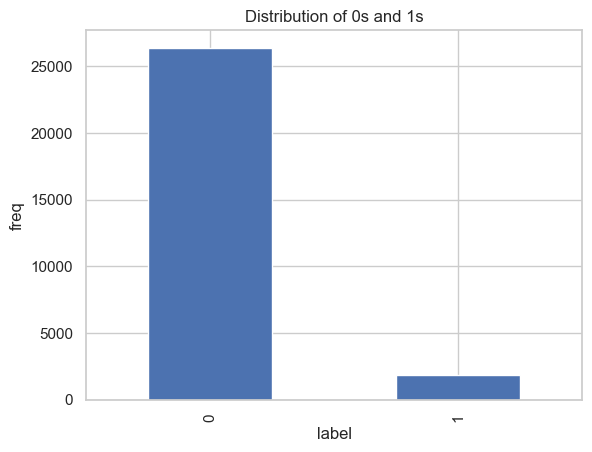

In [131]:
train_df['label'].value_counts().plot(kind='bar', title='Distribution of 0s and 1s', legend=False, ylabel = 'freq')
plt.show()

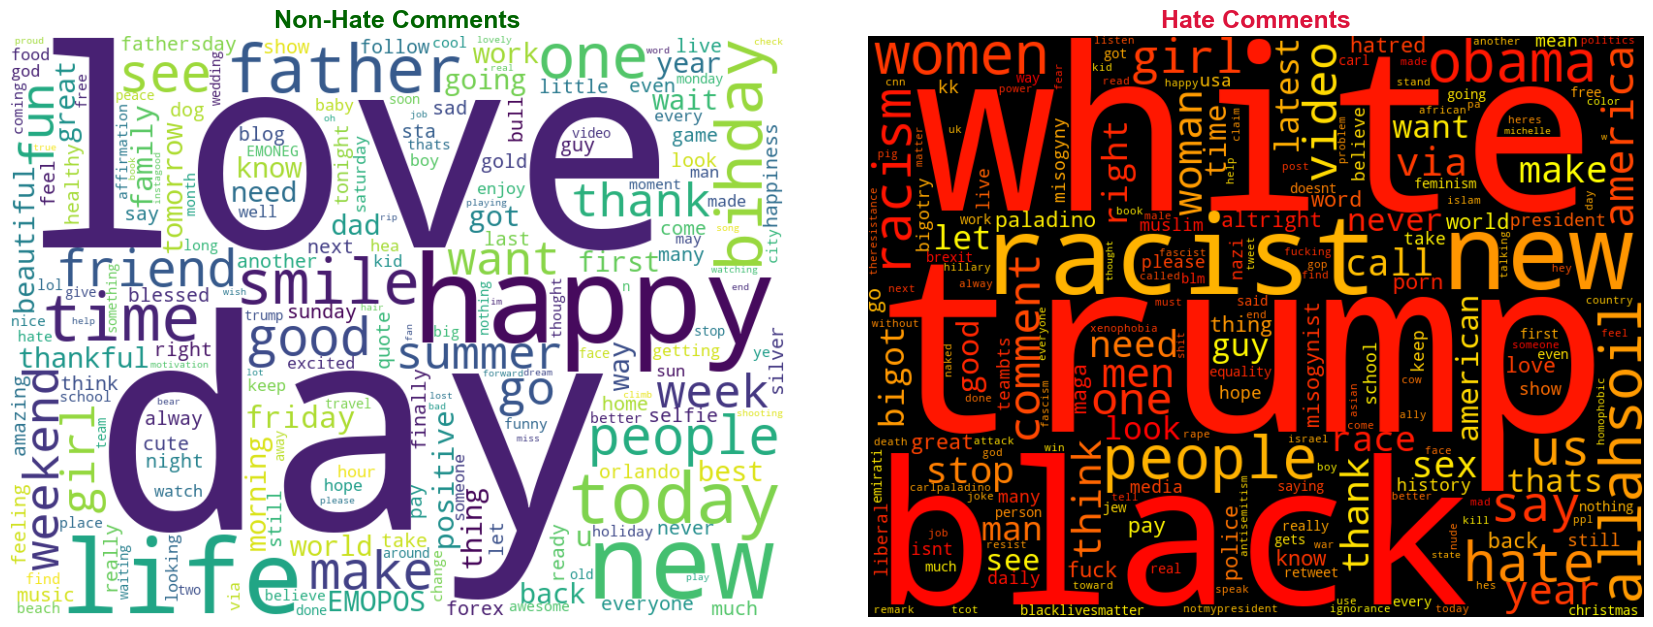

In [132]:
# Prepare text
text_pos = " ".join(train_df['cleaned_tweet'][train_df.label == 0])
text_neg = " ".join(train_df['cleaned_tweet'][train_df.label == 1])

# Generate word clouds with improvements
train_cloud_pos = WordCloud(
    width=800, height=600,
    collocations=False,
    background_color='white',
    colormap='viridis',
    max_words=200,
    random_state=42
).generate(text_pos)

train_cloud_neg = WordCloud(
    width=800, height=600,
    collocations=False,
    background_color='black',
    colormap='autumn',
    max_words=200,
    random_state=42
).generate(text_neg)

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments', fontsize=18, weight='bold', color='darkgreen')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments', fontsize=18, weight='bold', color='crimson')

plt.tight_layout(pad=5)
plt.show()

## Word Frequency Countplots

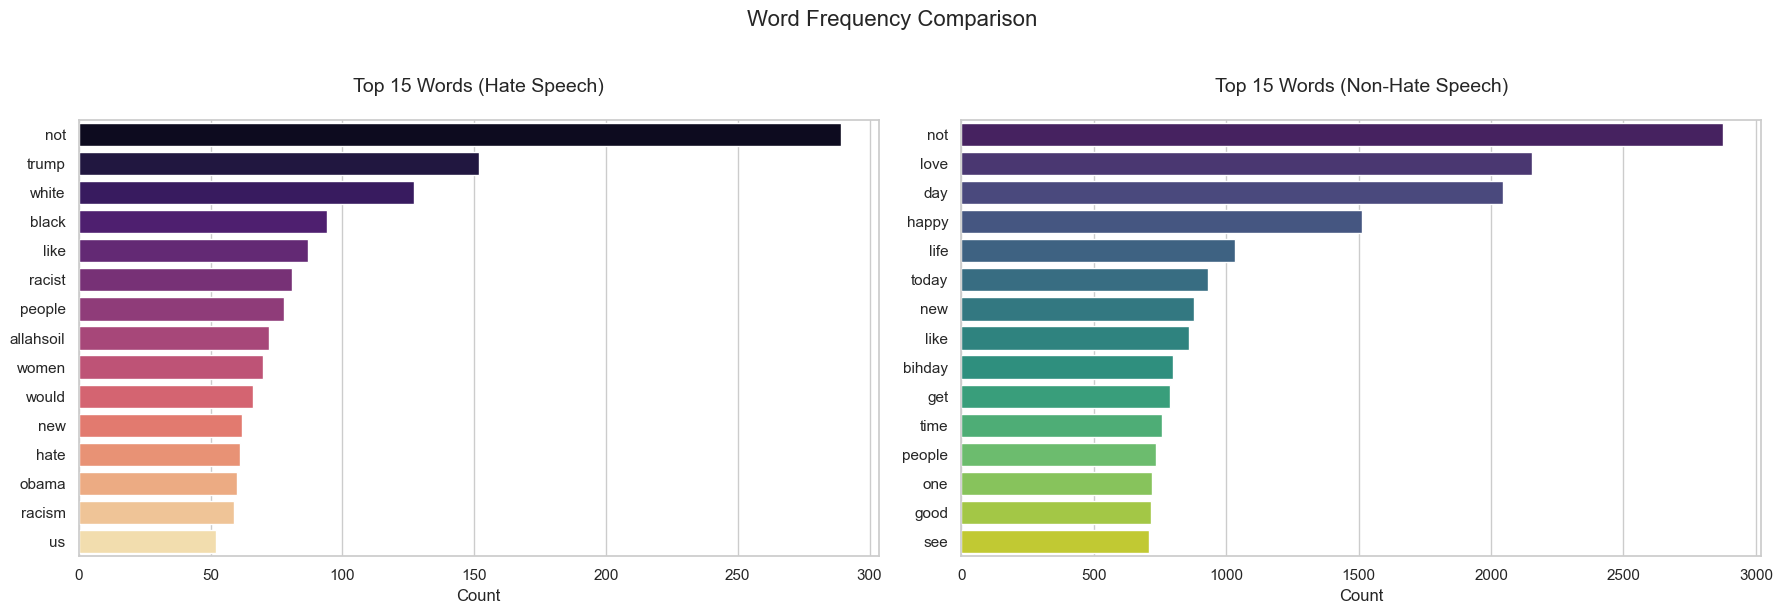

In [133]:
# Set style for better visuals
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# Get top words for each label
def get_top_words(series, n=15):
    all_words = ' '.join(series.dropna()).split()
    return Counter(all_words).most_common(n)

# Plot for label 1
plt.subplot(1, 2, 1)
top_label1 = get_top_words(train_df[train_df['label'] == 1]['cleaned_tweet'])
sns.barplot(x=[count for word, count in top_label1],
            y=[word for word, count in top_label1],
            hue=[word for word, count in top_label1],
            palette="magma",
            legend=False)
plt.title('Top 15 Words (Hate Speech)', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')

# Plot for label 0
plt.subplot(1, 2, 2)
top_label0 = get_top_words(train_df[train_df['label'] == 0]['cleaned_tweet'])
sns.barplot(x=[count for word, count in top_label0],
            y=[word for word, count in top_label0],
            hue=[word for word, count in top_label0],
            palette="viridis",
            legend=False)
plt.title('Top 15 Words (Non-Hate Speech)', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')

# Final adjustments
plt.suptitle('Word Frequency Comparison', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Save New CSV

In [134]:
new_train_df = train_df[['label', 'cleaned_tweet']]
new_train_df.to_csv('cleaned_tweets.csv', index=False)

# Inspect Tweets 

## Random Sampling $n=20$

In [135]:
# Run this code as many times as you want to get a glimpse of what the tweets look like
train_df.sample(n=20)

,id,label,tweet,cleaned_tweet
16163,16164,0,i miss la â¤ï¸ #losangeles #favouriteplace #la #traveller #tblogger #bblogger #bloggersâ¦,miss la losangeles favouriteplace la traveller tblogger bblogger bloggers
31858,31859,0,"#humpday enjoy my newest act simply titled ""stripper"" i filmed this yesterday to applyâ¦",humpday enjoy newest act simply titled stripper filmed yesterday apply
5632,5633,0,already knocked out after a long day#got daddy tired as well â¦,already knocked long daygot daddy tired well
28837,28838,0,the beautiful daddy youssoupha kandji and the little #jannah #smile,beautiful daddy youssoupha kandji little jannah smile
11617,11618,0,"@ a bar to watch the cavs and a guy hid something under his arm weirdly, so the baender asked him to show it, def scared it was a gun",bar watch cavs guy hid something arm weirdly baender asked show def scared gun
2007,2008,0,we absolutely need it! thx u,absolutely need thx
25567,25568,0,wishful thinking. #dailysummerlivinð #wish #beautiful #finalsweek,wishful thinking dailysummerlivin wish beautiful finalsweek
3189,3190,0,read why #dancing makes you here: @user @user @user,read dancing makes
24300,24301,0,"@user you're a loser with 27,000, soon we will have more fans then you.",loser soon fans
21336,21337,0,tonight we are young!!,tonight young


## Specific Tweets

In [136]:
indices = [15012, 25834, 350, 15069, 84, 16288, 10717, 1886]
combined = train_df[train_df['id'].isin(indices)]
combined

,id,label,tweet,cleaned_tweet
83,84,0,carrying a gun wouldn't of helped if you can't take it in with you. gun control won't stop the black market! terrorism will get worse!,carrying gun would not helped not take gun control would not stop black market terrorism get worse
349,350,0,my little brother has a higher tolerance of alcohol than me! lol,little brother higher tolerance alcohol lol
1885,1886,0,my ps4 got water damaged and now it's broke #day,got water damaged broke day
10716,10717,0,@user âï¸ my song âï¸ ð¶ heyyyy wait a minute ð¶ no you can't do this to me ð gwen stefani - make me like you,song heyy wait minute not gwen stefani make like
15011,15012,1,@user @user commercial showing inter-racial couple attacked by @user #amerikkka suppoers,commercial showing interracial couple attacked amerikka suppoers
15068,15069,0,@user ~~ happy day with my puppy on the last day ^^) #puppy #rainyday,happy day puppy last day EMOPOS puppy rainyday
16287,16288,0,@user no1 has 2 agree wit wat we do. if we gave a fuck we wouldn't have got in the biz. do u have nothing better 2 do.,agree wit wat gave fuck would not got biz nothing better
25833,25834,0,@user i was looking forward to this when i booked my vacation to korea but i didn't know it was this late...,looking forward booked vacation korea not know late


## Filter

In [137]:
train_df[train_df['tweet'].str.contains(r"\bno1\b", regex=True)]

,id,label,tweet,cleaned_tweet
6508,6509,0,"@user this world, this country.so much turmoil. our youth are gone..no1 has nothing to look forward to, nothing to hope forâ¦",world countryso much turmoil youth nothing look forward nothing hope
16287,16288,0,@user no1 has 2 agree wit wat we do. if we gave a fuck we wouldn't have got in the biz. do u have nothing better 2 do.,agree wit wat gave fuck would not got biz nothing better
30404,30405,0,"i wonder why we bothered moving bk to essex?! no1 eva comes to see us, no1 eva asks me to go out at least in kent i did my own thing!",wonder bothered moving bk essex eva comes see us eva asks go least kent thing


In [3]:
import tensorflow as tf

print("GPU Available: ", tf.config.list_physical_devices('GPU'))

ModuleNotFoundError: No module named 'tensorflow'

# Things to Try

- Split words without spaces¶
- Handle Typos (SymSpell: https://github.com/wolfgarbe/SymSpell/blob/master/SymSpell.FrequencyDictionary/en-80k.txt)